In [10]:
import torch
import random
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from sklearn.model_selection import train_test_split

In [11]:
class CatNet(nn.Module):
    def __init__(self, inputsize, outputsize):
        super().__init__()
        self.inputsize = inputsize
        self.outputsize = outputsize
        self.model = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, 3, padding=1),
            torch.nn.ReLU(),
            torch.nn.Flatten(),
            torch.nn.Linear(16*16*32, outputsize)
        ) 
    def forward(self, x):
        return self.model(x)


In [12]:
train_dataset = torch.load("datasets/train.pt")
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=False)
test_dataset = torch.load("datasets/test.pt")
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

In [13]:
num_epochs = 2
learning_rate = 0.01
weight_decay = 0.01
model = CatNet(16, 18)
criterion = torch.nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay) 
loss_history = []

for i in range(num_epochs):
    for x_batch, y_batch in train_dataloader:
        predictions = model.forward(x_batch)

        loss = criterion(predictions, y_batch)

        # Backward
        loss.backward()

        # Update weights
        optimizer.step()
        optimizer.zero_grad()

        loss_history.append(loss.item())
    print(f'{i+1}/{num_epochs} current loss: {loss}')   

1/2 current loss: 2.2885875701904297
2/2 current loss: 2.271191120147705


In [24]:
x, y = train_dataset[0]

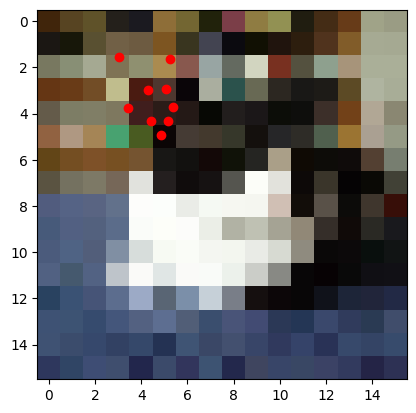

In [29]:
x, y = train_dataset[0]
draw_img = x.type('torch.IntTensor')
draw_points = model.forward(torch.stack([x]))[0].detach().numpy()
plt.imshow(draw_img.permute(1,2,0))
for i in range(0, len(draw_points),2):
            x, y = draw_points[i], draw_points[i+1] 
            plt.plot(x,y, 'ro')
plt.show()